In [1]:
""""
Задания:
    1)Выполните отделение корней аналитически и найдите один из корней методами дихотомии и хорд с абсолютной погрешностью 0,0001 f = x**4 - x**3 -2*x**2 + 3*x - 3
    2)Выполните отделение корней графически и найдите один из корней методами простой итерации и Ньютонас абсолютной погрешностью 0,0001. (x**x) = 20 - 9*x
    3)Найдите одно из решений системы уравнений методом Ньютона с абсолютной погрешностью 0,0001. {cos(x−1) + y = 0.5 ; x − cos(x) = 3} 
    
    везде Е = 0.0001 - погрешность
"""

"""
Задание 1
Функции:
    f(x) - данная функция, для которой будем искать корни
    lines(a,b) - находит точку (x,0) для прямой проходящей через точка а и b, на выходе координата х (т.к у нам не нужна)
Константы:
    a,b - Х-координаты внутри которых находится корень уравнения
    с - точка между a,b, необходима для уменьшения отрезка [a,b] , внутри которого корень, т.е для увелличения точности путем переобозначения 
    n - количество повторов соответствующего цикла 
Корень:
    методом подбора был получен корень: x = 3 ^ (1/2) = 1,73205080757   
"""

def f(x):
    f = x**4 - x**3 -2*x**2 + 3*x - 3
    return f 

def lines(a,b):
    x = -(f(a)*(b-a)/(f(b)-f(a))) + a
    return x

print("Метод Хорд")

a = 0
b = 2
E = 0.0001
c = lines(a,b) 
n = 0
while (b-a) > E:
    if (f(a)*f(c) <= 0):
        b = c 
    else: 
        if (f(b)*f(c) <= 0):
            a = c     
    c = lines(a,b)
    n = n + 1
print("n =",n)     
print("x =", c)    

print("Метод Дихотомии")
a = 0
b = 2
E = 0.0001
c = (a+b)/2 
n = 0
while (b-a) > E:
    if (f(a)*f(c) <= 0):
        b = c 
    else: 
        if (f(b)*f(c) <= 0):
            a = c     
    c = (a+b)/2
    n = n + 1
print("n =",n)     
print("x =", c)   

Метод Хорд
n = 31
x = 1.7320508075688772
Метод Дихотомии
n = 15
x = 1.732025146484375


Метод Ньютона
n = 5
x = 1.8662298423466661
Метод Итерации
n = 14
x = 1.8662343600565074


C:\Users\Kirill\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


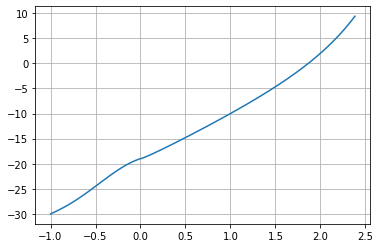

In [2]:
"""
Задание 2
Функции:
    f(x) - данная функция, для которой будем искать корни
    lines(a,b) - находит точку (x,0) для прямой проходящей через точка а и b, на выходе координата х (т.к у нам не нужна)
Константы:
    i,b - Х-координаты внутри которых находится корень уравнения, вибирались по графику (таким образом, что б на графике была точка (x,0))
    T - логическая переменная, имеющая значение True, когда значение функции находится в зоне погрешности 
    n - количество повторов соответствующего цикла 
"""

import matplotlib.pyplot as plt
import math

def f(x):
    f = (x**x) + 9*x - 20
    return (f)

"Строим график и смотрим, где функция пересекает ось Х - это наш корень, который мы будем искать"
arr = []
brr = []
i = -1
b = 2.4
while i < b:
    brr.append(f(i))
    arr.append(i)
    i = i + (b/100)
plt.plot(arr,brr)    
plt.grid(True)

"""
Из рисунка беру точку х0 = 1 , считаю производную(аналитически = 9 + (log(x) + 1)*x^x) и функцию в этой точке, нахожу dx 
функции:
    fI(x) - производная функции, найденная аналитически 
    dx(x) - находит смещение нужное для приближения к с точке пересечния оси x и исходной функции(использует "динамическую" производную)
    dX(x) - так же находит смещение, но использует "статическую" производную (FI), найденную от первой точке 
"""

def fI(x):
    fI = 9 + ((math.log(x) + 1)*x**x)
    return (fI)

def dx(x):
    dx = -(f(x)/fI(x))
    return(dx)

def dX(x):
    dX = -(f(x)/FI)
    return(dX)


print("Метод Ньютона")
E = 0.0001
x0 = 1
n = 0
T = False
while (T == False):
    if (f(x0) < -E):
        x0 = x0 + dx(x0)
    elif (f(x0) > E): 
        x0 = x0 + dx(x0)
    else: T = True
    n += 1
print("n =",n)        
print("x =" , x0)

print("Метод Итерации")
x0 = 1
n = 0 
T = False
FI = fI(x0)
while (T == False):
    if (f(x0) < -E):
        x0 = x0 + dX(x0)
    elif (f(x0) > E): 
        x0 = x0 + dX(x0)
    else: T = True
    n += 1 
print("n =",n)     
print("x =" , x0)

In [3]:
"""
Задание 3
Функции:
    В этот раз писал через # по ходу программы
Константы:
    xo,y0 - стартовые координаты
    k - логическая переменная, имеющая значение True, когда значение функции находится в зоне погрешности 
    n - количество повторов соответствующего цикла 
"""
import numpy as np
from numpy import linalg as LA

#первая функция
def f1(x,y):
    f1 = np.cos(x-1) + y - 0.5
    return(f1)  
#вторая функция
def f2(x):   
    f2 = x - np.cos(x) - 3
    return(f2)
#производная первой функции по х
def f1Ix(x,y):
    f1Ix = -np.sin(x-1)
    return(f1Ix)  
#производная второй функции по х
def f2Ix(x):
    f2Ix = np.sin(x) + 1
    return(f2Ix)   
#производные по у - константы, поэтому они не будут пересчитываться в дальнейшем 
f1Iy = 1
f2Iy = 0

#Матрица Якоби, вывожу обратую
def J(x,y):
    J = ([[f1Ix(x,y), f1Iy],[f2Ix(x), f2Iy]])
    Jinv = LA.inv(J)
    return(Jinv)

#Вектор функций
def F(x,y):
    F = ([f1(x,y)],[f2(x)])
    return (F)
#смещение к корням
def dx(x,y):
    dx = - J(x,y).dot(F(x,y))  
    return (dx)
print("Решение системы уравнений")
x0 = 0
y0 = 0
E = 0.0001
n = 0
k = False
while k == False:
    X = np.array([[x0],[y0]])
    if (f1(x0,y0) < -E) or (f1(x0,y0) > E) or (f2(x0) < -E) or (f2(x0) > E):
        X = X + dx(x0,y0) 
        x0 = X[0][0]
        y0 = X[1][0]
    else: k = True
    n = n + 1

print("n =",n)      
print("x0 =",x0) 
print("y0 =",y0) 

Решение системы уравнений
n = 10
x0 = 2.319390521579496
y0 = 0.25123418219697574
